In [1]:
import jax.numpy as jnp
import jax
import src.models
import orbax.checkpoint
from src.training import utils

Setup to load in checkpoint

In [2]:
orbax_checkpointer = orbax.checkpoint.PyTreeCheckpointer()

T = 1.0
N = 100

def get_score(dim):
    y = jnp.ones(shape=(dim,))
    checkpoint_path = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/fixed_y_{y}_d_{dim}_T_{T}"
    restored = orbax_checkpointer.restore(checkpoint_path)
    model = src.models.score_mlp.ScoreMLP(**restored["network"])
    params = restored["params"]
    trained_score = utils.trained_score(model, params)
    sde = restored["sde"]
    return trained_score, sde


Find errors for different d and T

In [3]:
def error(ts, true_score, trained_score, sde):
    true = jax.vmap(true_score, in_axes=(0, None, None, None))(ts, sde["x0"], sde["T"], sde["y"])
    trained = jax.vmap(trained_score, in_axes=(0, None))(ts, jnp.asarray(sde["x0"]))
    return jnp.mean(jnp.abs(true - trained))

In [4]:
from src.data_generate_sde import sde_ornstein_uhlenbeck, time

trained_score_8d, sde_8d = get_score(8)
trained_score_1d, sde_1d = get_score(1)
trained_score_4d, sde_4d = get_score(4)

true_score = sde_ornstein_uhlenbeck.score
ts = time.grid(0, T, 100)

error_d_8 = error(ts[:-1], true_score, trained_score_8d, sde_8d)
error_d_1 = error(ts[:-1], true_score, trained_score_1d, sde_1d)
error_d_4 = error(ts[:-1], true_score, trained_score_4d, sde_4d)

In [5]:
print(error_d_8)
print(error_d_1)
print(error_d_4)

0.16321523
0.16908653
0.15441106


In [6]:
from tueplots import bundles
import matplotlib.pyplot as plt

bundle = bundles.neurips2023()
plt.rcParams.update(bundle)

true_score = sde_ornstein_uhlenbeck.score

(<Figure size 550x339.919 with 4 Axes>,
 array([<Axes: title={'center': 'Time: 0.00'}>,
        <Axes: title={'center': 'Time: 0.25'}>,
        <Axes: title={'center': 'Time: 0.50'}>,
        <Axes: title={'center': 'Time: 0.75'}>], dtype=object))

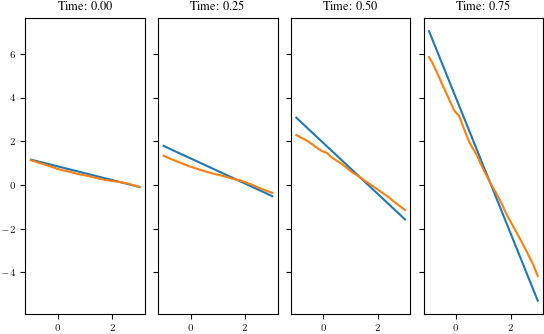

In [7]:
from src.plotting import plot_score

def adjusted_true_score(t, x, T, y, x0):
    true = true_score(t, x, T, y)
    adjustment = true_score(0, x0, T, y)
    return 

plot_score(true_score, trained_score_1d, T, (1.,))


In [8]:
x0= (1.,) 
checkpoint_path_forward = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/forward_data_fixed_x0_{x0}"
restored_forward = orbax_checkpointer.restore(checkpoint_path_forward)
model = src.models.score_mlp.ScoreMLP(**restored_forward["network"])
params = restored_forward["params"]
trained_score_forward = utils.trained_score(model, params)

(<Figure size 550x339.919 with 4 Axes>,
 array([<Axes: title={'center': 'Time: 0.00'}>,
        <Axes: title={'center': 'Time: 0.50'}>,
        <Axes: title={'center': 'Time: 0.75'}>,
        <Axes: title={'center': 'Time: 0.95'}>], dtype=object))

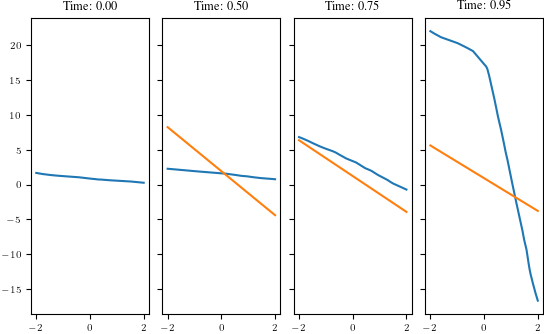

In [9]:
from src.plotting import plot_forward_score
plot_forward_score(sde_ornstein_uhlenbeck.score_forward, trained_score_forward, x0)

In [10]:
x0= (1.,) 
y = (10.,)
checkpoint_path_guided = f"/Users/libbybaker/Documents/Python/doobs-score-project/doobs_score_matching/checkpoints/ou/guided_data_y_{y}_d_x0_{x0}"
restored = orbax_checkpointer.restore(checkpoint_path_guided)
model = src.models.score_mlp.ScoreMLP(**restored["network"])
params = restored["params"]
trained_score_guided = utils.trained_score(model, params)

(<Figure size 550x339.919 with 4 Axes>,
 array([<Axes: title={'center': 'Time: 0.00'}>,
        <Axes: title={'center': 'Time: 0.25'}>,
        <Axes: title={'center': 'Time: 0.50'}>,
        <Axes: title={'center': 'Time: 0.75'}>], dtype=object))

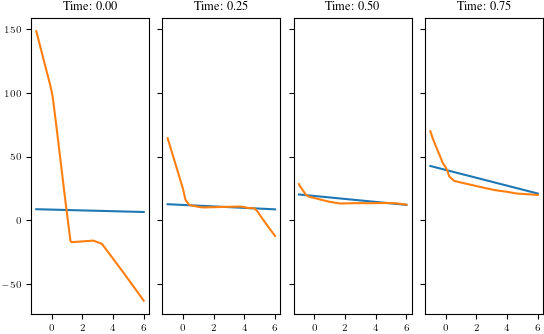

In [17]:
plot_score(true_score, trained_score_guided, T, (10.,), x=jnp.linspace(-1, 6, 1000)[..., None],)